# Example: Observation Planning

This example outlines a common use case for coordinate transformations: observability curves to assist planning or executing an observing run. 
This serves to demonstrate typical usage of SkyCoord and the transformation framework.

Let’s suppose you are planning to visit picturesque Bear Mountain State Park in New York, USA. You’re bringing your telescope with you (of course), and someone told you M33 is a great target to observe there. You happen to know you’re free at 11:00 pm local time, and you want to know if it will be up. Astropy can answer that. In the example below, we make a SkyCoord to look up the coordinates of M33 online, and then transform to horizontal coordinates (AltAz) using an astropy.time.Time object for when we’re observing and an EarthLocation object for the park:

In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

Use SkyCoord to get the M33 cooridnates online:

In [78]:
m33 = SkyCoord.from_name('M33')
#m33
#m33.dec.hms
#m33.galactic

Set location of the observatory:

In [79]:
bear_mountain = EarthLocation(lat=41.3*u.deg, lon=-74*u.deg, height=390*u.m)

Set time of observation:

In [80]:
utcoffset = -4*u.hour  # Eastern Daylight Time

In [81]:
time = Time('2012-7-12 23:00:00') - utcoffset

Transform into Horizontal coordinates:

In [82]:
m33altaz = m33.transform_to(AltAz(obstime=time,location=bear_mountain)) 

In [83]:
"M33's Altitude = {0.alt:.2}".format(m33altaz)

"M33's Altitude = 0.13 deg"

Oops, so low of an altitude indicates M33 is only just rising, so the trees and mountains will be in the way. You’d better make a plot to see what the night is going to look like. We’ll do it by airmass, too, because that’s a better measure of telescope observing conditions:

In [84]:
midnight = Time('2012-7-13 00:00:00') - utcoffset
delta_midnight = np.linspace(-2, 7, 100)*u.hour
m33altazs = m33.transform_to(AltAz(obstime=midnight+delta_midnight, location=bear_mountain))  

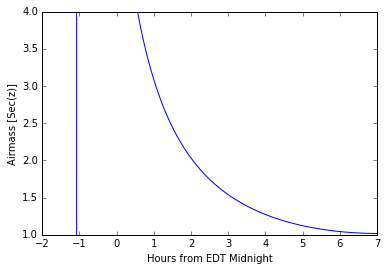

In [85]:
plt.plot(delta_midnight, m33altazs.secz)  
plt.xlim(-2, 7)  
plt.ylim(1, 4)  
plt.xlabel('Hours from EDT Midnight')  
plt.ylabel('Airmass [Sec(z)]') 

Hmm, looks like you may need to stay up pretty late. But maybe you’re an early-riser? Then you need to know when the sun is rising, and when it will be twilight. We can get the sun’s location with get_sun and then plot the altitude and color-code by azimuth:

In [86]:
from astropy.coordinates import get_sun
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
times = midnight + delta_midnight
altazframe = AltAz(obstime=times, location=bear_mountain)
sunaltazs = get_sun(times).transform_to(altazframe)
m33altazs = m33.transform_to(altazframe)  

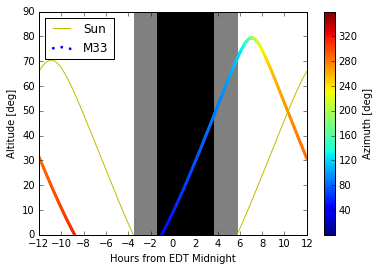

In [87]:
plt.plot(delta_midnight, sunaltazs.alt, color='y', label='Sun')  
plt.scatter(delta_midnight, m33altazs.alt, c=m33altazs.az, label='M33', lw=0, s=8)  
plt.fill_between(delta_midnight.to('hr').value, 0, 90, sunaltazs.alt < -0*u.deg, color='0.5', zorder=0)  
plt.fill_between(delta_midnight.to('hr').value, 0, 90, sunaltazs.alt < -18*u.deg, color='k', zorder=0)  
plt.colorbar().set_label('Azimuth [deg]')  
plt.legend(loc='upper left')  
plt.xlim(-12, 12)  
plt.xticks(np.arange(13)*2 -12)  
plt.ylim(0, 90)  
plt.xlabel('Hours from EDT Midnight')  
plt.ylabel('Altitude [deg]') 